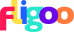

<hr>
<p style="font-size:40px;text-align:center">Take Home - Data Science</p>
<hr>

# The Hotel Bookings Data
Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or custumer identification were deleted.

**Take-Home Goals**
- During **Part I**, you should perform an Exploratory Data Analysis highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by plots / tables / metrics.
- In **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - Feature extraction: Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
  - Machine Learning modeling: at least one fitted model with the given data. You could use the `children` column as target.
- Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  
**Requirements**
- Python 3.x & Pandas 1.x
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Dockerfile to setup environment / Conda environment for isolation.
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.


## Part I - Exploratory Data Analisys

In [1]:
# Importar librerías  
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [2]:
# Leer la base de datos
hotels = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/hotels.csv')
# Genero una variable dicotomica para children
hotels['dummy_children'] = np.where(hotels["children"]=="none",0,1)

In [3]:
# Analizar sus variables
hotels.columns

Index(['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'average_daily_rate',
       'required_car_parking_spaces', 'total_of_special_requests',
       'arrival_date', 'dummy_children'],
      dtype='object')

In [4]:
import warnings
warnings.filterwarnings('ignore')

#### Overview

In [5]:
# Para una visión general de los datos decidí utilizar el reporte que genera pandas_profiling.
profile = pandas_profiling.ProfileReport(hotels)

profile.to_file("first_look.html")



Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Lo primero que el html nos informa es un overview de los datos: 
# cantidad de variables, de observaciones:

hotels.shape

# Muestra las variables originales más la dummy creada para identificar children



(50000, 24)

#### Eliminar filas duplicadas

Las observaciones duplicadas serán eliminadas

In [7]:
# El informe muestra duplicados (%).
# En la sección de "Warnings" lo primero que se informa es "Dataset has 6615 (13.2%) duplicate rows"
# Procederpe a eliminar filas duplicadas

hotels["duplicate"] = hotels.duplicated(keep = "first")
hotels = hotels[hotels["duplicate"]== False].reset_index(drop=True).drop(columns="duplicate")
print("Al eliminar filas duplicadas, la base de datos ahora cuenta con ", hotels.shape[0], " observaciones")

Al eliminar filas duplicadas, la base de datos ahora cuenta con  43385  observaciones


#### Valores ausentes (missing, NA) y alta proporción de ceros

No hay muchos valores ausentes en la base de datos, luego de eliminar por duplicados solo quedan missings en la variable "country". Decidí no utilizar esta variable como independiente en el modelo, por lo que no eliminé las filas asociadas a missing en la variable country.

Adicionalmente, el html generado informa que la variable "country" tiene una alta cardinalidad, al igual que "arrival_date". Ambas advertencias parecen ser razonables por los conceptos de las variables. Más adelante se tratará la variable "arrival_date"..

In [8]:
# Siguiendo con la información que nos brinda el html "first_look" 
# Missing cells exists

hotels.isnull().sum()

# Luego de depurar por duplicados, quedaron 287 observaciones con valores ausentes en la variable "country"
# Si la variable resultara de interés para predecir la variable objetivo, se depuraría de la siguiente manera:

# hotels = hotels[hotels["country"].isnull() == False].reset_index(drop=True)
# print("Al eliminar filas con NA, la base de datos ahora cuenta con ", hotels.shape[0], " observaciones")

hotel                               0
lead_time                           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
meal                                0
country                           287
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
average_daily_rate                  0
required_car_parking_spaces         0
total_of_special_requests           0
arrival_date                        0
dummy_children                      0
dtype: int64

Siguiendo con la información que nos brinda el html "first_look" - "Warnings", se observa que "previous_cancellations" se encuentra muy sesgada. Esta variable informa la cantidad de reservas (bookings) previas que han sido canceladas por el cliente antes de la reserva actual. No resulta llamativo que esta variable esté sesgada por su definición. 

Las siguientes variables tienen también una proporción llamativa de ceros, pero no son llamativos por su definición:
* stays_in_weekend_nights: 43.3% ceros
* stays_in_week_nights: 7.6%
* previous_bookings_not_canceled: 95.5%
* booking_changes: 79.6%
* days_in_waiting_list: 98.2%
* total_of_special_requests: 49.0%
* lead_time: 7.8%

Una variable que no tiene una alta proporción de ceros pero que si llama la atención es la definida como la cantidad de adultos en la reserva ("adults"). Se ven dos opciones:

1) Siempre es necesario que un adulto acompañe a los niños en una reserva de hotel

2) Los padres pueden estar en el hotel y haber reservado una habitación para sus niños solos

Como desconozco cómo funciona, he decidido optar por la segunda opción, por lo que eliminaré los datos donde no hay adultos en la reserva y no hay niños tampoco.

In [9]:
# adultos = 0

# ver = hotels[(hotels["adults"] == 0) & (hotels["children"] == "none") ]
# ver[["adults", "dummy_children"]].describe()

hotels = hotels[(hotels["adults"] != 0) | (hotels["children"] != "none") ]
# hotels = hotels[(hotels["adults"] != 0) ]

print("Al eliminar observaciones con cero adultos, la base de datos ahora cuenta con ", hotels.shape[0], " observaciones")

Al eliminar observaciones con cero adultos, la base de datos ahora cuenta con  43283  observaciones


#### Average Daly Rate

average_daily_rate: Se calcula como la suma de todas las transacciones por la reserva dividida la cantidad de noches de estadía. Básicamente, se entiende como un precio.

In [10]:
adr = hotels.copy()[["average_daily_rate", "children"]]
adr.describe()

,average_daily_rate
count,43283.000000
mean,101.802683
std,50.796742
min,-6.380000
25%,68.000000
50%,94.500000
75%,129.000000
max,510.000000


average_daily_rate posee valores negativos, al ser un precio (y no tener más información) no aceptaremos valores negativos y por lo tanto los eliminaré.

Adicionalmente, se presenta que hay valores donde el adr es igual a cero. Mi primera intuición fue relacionar el adr = 0 con las cancelaciones (is_cancel), pero al no tener dicha variable en la base propuesta, asumo que no corresponde y los eliminaré de la base.

In [11]:
# Se eliminan valores negativos y cero
hotels = hotels[hotels["average_daily_rate"]>0]
hotels["average_daily_rate"].describe()

# ver = hotels[hotels["average_daily_rate"]<5]
# ver.shape

count    42278.000000
mean       104.222809
std         48.881417
min          1.000000
25%         70.000000
50%         95.000000
75%        130.000000
max        510.000000
Name: average_daily_rate, dtype: float64

Si bien quedan observaciones con adr muy bajo, como por ejemplo adr=1 (el mínimo), al desconocer las políticas de precio de los hoteles no hice ninguna consideración adicional. Bajo un esquema de trabajo con cliente, me gustaría conocer más acerca de cómo son las operativas y analizar si se trata de errores, outliers por alguna razón, etc.

In [12]:
print("Al depurar la variable adr, la base de datos queda con ", hotels.shape[0], " observaciones")

Al depurar la variable adr, la base de datos queda con  42278  observaciones


Considerando que se tiene la información de cuántos adultos se alojaron en la habitación, se puede construir una variable que indique el costo por día por adulto. Considerando que no se tiene el número de niños y que existen habitaciones con cero adultos pero que tienen niños, para el calculo de la variable se tomaron las habitaciones con adulto = 0 como si se alojara sólo un adulto.

In [13]:
hotels["adr_per_adult"] = hotels["average_daily_rate"]/np.where(hotels["adults"]==0, 1 ,hotels["adults"])
hotels["adr_per_adult"].describe()

# print(np.corrcoef(hotels["adr_per_adult"],hotels["average_daily_rate"]) )


count    42278.000000
mean        58.937981
std         29.442706
min          0.500000
25%         39.000000
50%         52.635000
75%         72.000000
max        510.000000
Name: adr_per_adult, dtype: float64

#### Variable target

La variable target se encuentra claramente desbalanceada en la muestra, esto influirá en el segundo apartado del desafio.

In [14]:
tabla = hotels[["children"]].value_counts().reset_index()
tabla

,children,0
0,none,38345
1,children,3933


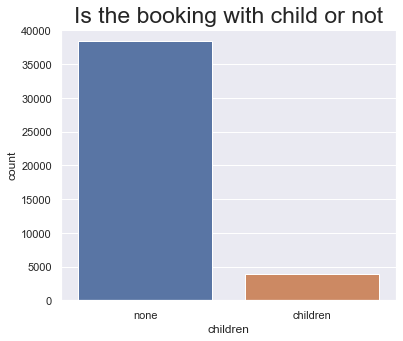

In [15]:
plt.figure(figsize=(6,5))
sns.set(style = "darkgrid")
plt.title("Is the booking with child or not", fontdict = {'fontsize': 23})
axis = sns.countplot(x = "children",  data = hotels)

#### Fecha de arribo 

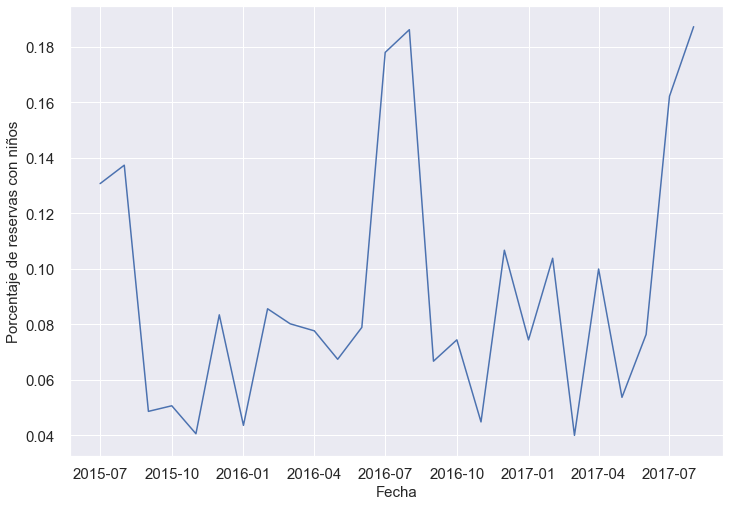

In [16]:
df = hotels.copy()
df['date'] = pd.to_datetime(df['arrival_date'])
df['date'] = df['date'] + pd.offsets.Day() - pd.offsets.MonthBegin()
df_fechas = df.groupby('date').agg(sum_room_child = ('dummy_children', 'sum'),
                                  cant_room = ('dummy_children', 'count')).reset_index()
df_fechas['porc_room_child'] = df_fechas['sum_room_child']/df_fechas['cant_room']
# df_fechas
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = plt.axes()
sns.lineplot(x = 'date', y = 'porc_room_child',data=df_fechas)
plt.ylabel('Porcentaje de reservas con niños', size=15)
plt.xlabel('Fecha', size=15)
ax.xaxis.set_tick_params(pad = 5, labelsize=15)
ax.yaxis.set_tick_params(pad = 10, labelsize=15)
plt.show()


La relación entre la proporción de reservas con niños la fecha de arribo parece tener picos en los meses 7 y 8 (correspondiente a épocas de alta demanda por vacaciones de los niños en el hemisferio norte). Por lo tanto se creará una variable que se corresponda con la alta demanda en esas fechas: "high_demand".

In [17]:
hotels['month'] = pd.to_datetime(hotels['arrival_date']).dt.month
df = hotels[['month', "children", "dummy_children"]] 
group_mc = df.groupby(["month", "children"]).count().reset_index()
group_m = df.groupby(["month"]).count().reset_index().drop(columns="dummy_children").rename(columns={"children":"total"})
group = group_mc.merge(group_m, how="left", on="month").rename(columns={"dummy_children":"count"})
group["porc"] = (group["count"]/group["total"])*100

tabla_mes = pd.pivot_table(group[["month","children", "porc"]], index= "month", columns= "children")
tabla_mes

porc           
children   children       none
month                         
1          6.106232  93.893768
2          9.497746  90.502254
3          6.089239  93.910761
4          8.890101  91.109899
5          6.025896  93.974104
6          7.756003  92.243997
7         16.349727  83.650273
8         17.484723  82.515277
9          5.845881  94.154119
10         6.425365  93.574635
11         4.324734  95.675266
12         9.670782  90.329218

In [18]:
hotels["high_demand"] = np.where((hotels['month'] == 7) | (hotels['month'] == 8), 1,0)
hotels["high_demand"].describe()

count    42278.000000
mean         0.228204
std          0.419680
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: high_demand, dtype: float64

#### Tipo de habitación: reservada vs asignada

In [19]:
print(hotels["reserved_room_type"].unique())
print(hotels["assigned_room_type"].unique())


['A' 'D' 'F' 'C' 'B' 'E' 'G' 'H' 'L']
['A' 'K' 'F' 'C' 'D' 'E' 'I' 'B' 'G' 'H']


Entendiendo que cuando las familias eligen la habitación tienen en cuenta si tienen niños o no, analizaremos la variable "reserved_room_type". Por lo tanto, se creará una nueva variable "reserved_room_children", que será 1 si el porcentaje de reservas con niños de cada tipo de habitación es alto (mayor al 45%); es decir, se disminuye la cardinalidad de la variable de reserva.

In [20]:
# reserved_room_type

rrt = hotels[["reserved_room_type", "children","dummy_children"]]
group_rr_c = rrt.groupby(["reserved_room_type", "children"]).count().reset_index()
group_rr = rrt.groupby(["reserved_room_type"]).count().reset_index().drop(columns="dummy_children").rename(columns={"children":"total"})
group = group_rr_c.merge(group_rr, how="left", on="reserved_room_type").rename(columns={"dummy_children":"count"})
group["porc"] = (group["count"]/group["total"])*100


In [21]:
group_count = group.pivot(index = "reserved_room_type", columns='children')['count']
group_porc = group.pivot(index = "reserved_room_type", columns='children')['porc']
group_porc = group_porc.merge(group_rr, how="left",on="reserved_room_type").rename(columns={"total":"cant_obs"}).fillna(0)
group_count = group_count.merge(group_rr, how="left",on="reserved_room_type").rename(columns={"total":"cant_obs"}).fillna(0)
group_porc

,reserved_room_type,children,none,cant_obs
0,A,5.262035,94.737965,28126
1,B,28.863636,71.136364,440
2,C,70.864198,29.135802,405
3,D,5.631020,94.368980,8098
4,E,8.956252,91.043748,2903
5,F,49.190939,50.809061,1236
6,G,65.035800,34.964200,838
7,H,73.913043,26.086957,230
8,L,0.000000,100.000000,2


In [22]:
# Categórica que englobe las que tienen más presencia de niños
hotels["reserved_room_children"] = np.where( 
                               (hotels["reserved_room_type"] == "C") |
                               (hotels["reserved_room_type"] == "F") |
                               (hotels["reserved_room_type"] == "G") |
                               (hotels["reserved_room_type"] == "H") , 1,0)

Al existir un tipo de variable de reserva de habitación y una de asignación, se asume que hay habitaciones que se asignan distinto a lo que se reservó. Es decir que existe un cambio de tipo de habitación: una familia puede elegir el tipo A y al final se le asigna otra habitación. Para capturar este cambio se crea la variable 'change_room_type'.

In [23]:
# se cambió la habitación respecto a la reservada?
ver = hotels.copy()
ver["change_room_type"] = np.where(ver["assigned_room_type"] == ver["reserved_room_type"], 0,1)
tabla = ver[["change_room_type"]].value_counts().reset_index()#.set_index('change_room_type')
tabla.columns
print("Existen ", tabla.iloc[1,1] ," observaciones donde se cambió la habitación respecto de la reservada")

Existen  8022  observaciones donde se cambió la habitación respecto de la reservada


In [24]:
hotels["change_room_type"] = np.where(hotels["assigned_room_type"] == hotels["reserved_room_type"], 0,1)

#### Variables Categóricas

Tipo de consumidor

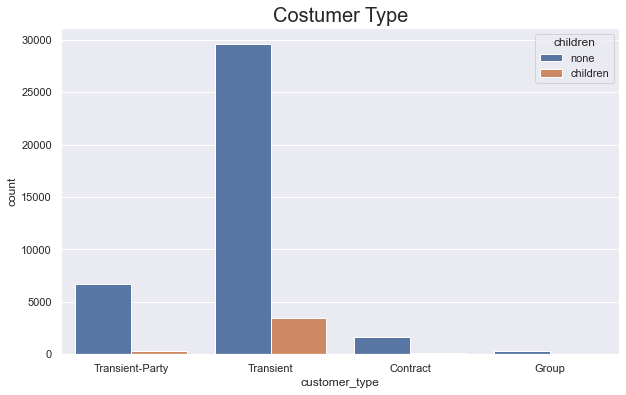

In [25]:
plt.figure(figsize=(10,6))
sns.set(style = "darkgrid")
plt.title("Costumer Type", fontdict = {'fontsize': 20})
axis = sns.countplot(x = "customer_type", hue = 'children', data = hotels)

Considerando que no hay un patrón muy claro respecto a los tipos de consumidores, no se elabora una variable nueva.

In [26]:
# customer_type

rrt = hotels[["customer_type", "children","dummy_children"]]
group_rr_c = rrt.groupby(["customer_type", "children"]).count().reset_index()
group_rr = rrt.groupby(["customer_type"]).count().reset_index().drop(columns="dummy_children").rename(columns={"children":"total"})
group = group_rr_c.merge(group_rr, how="left", on="customer_type").rename(columns={"dummy_children":"count"})
group["porc"] = (group["count"]/group["total"])*100
group_count = group.pivot(index = "customer_type", columns='children')['count']
group_porc = group.pivot(index = "customer_type", columns='children')['porc']
group_porc = group_porc.merge(group_rr, how="left",on="customer_type").rename(columns={"total":"cant_obs"}).fillna(0)
group_count = group_count.merge(group_rr, how="left",on="customer_type").rename(columns={"total":"cant_obs"}).fillna(0)
group_porc

,customer_type,children,none,cant_obs
0,Contract,5.738636,94.261364,1760
1,Group,4.970760,95.029240,342
2,Transient,10.499623,89.500377,33125
3,Transient-Party,4.779464,95.220536,7051


Segmento de mercado

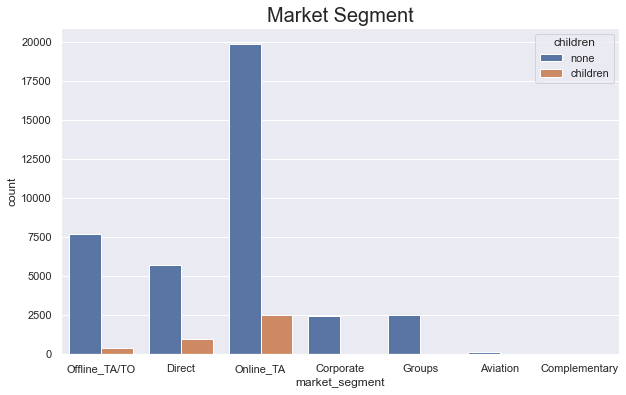

In [27]:
# graficos para categoricas
plt.figure(figsize=(10,6))
sns.set(style = "darkgrid")
plt.title("Market Segment", fontdict = {'fontsize': 20})
axis = sns.countplot(x = "market_segment", hue = 'children', data = hotels)

Para el caso de segmento de mercado, se creará una variable "segment_nochild" incluyendo aquellos segmentos donde parece más improbable que se lleven niños - de nuevo, es una forma de reducir cardinalidad

In [28]:
# market_segment

rrt = hotels[["market_segment", "children","dummy_children"]]
group_rr_c = rrt.groupby(["market_segment", "children"]).count().reset_index()
group_rr = rrt.groupby(["market_segment"]).count().reset_index().drop(columns="dummy_children").rename(columns={"children":"total"})
group = group_rr_c.merge(group_rr, how="left", on="market_segment").rename(columns={"dummy_children":"count"})
group["porc"] = (group["count"]/group["total"])*100
group_count = group.pivot(index = "market_segment", columns='children')['count']
group_porc = group.pivot(index = "market_segment", columns='children')['porc']
group_porc = group_porc.merge(group_rr, how="left",on="market_segment").rename(columns={"total":"cant_obs"}).fillna(0)
group_count = group_count.merge(group_rr, how="left",on="market_segment").rename(columns={"total":"cant_obs"}).fillna(0)
group_porc

,market_segment,children,none,cant_obs
0,Aviation,0.000000,100.000000,119
1,Complementary,17.073171,82.926829,41
2,Corporate,1.219512,98.780488,2460
3,Direct,14.578656,85.421344,6681
4,Groups,1.572327,98.427673,2544
5,Offline_TA/TO,4.876536,95.123464,8059
6,Online_TA,11.124520,88.875480,22374


In [29]:
# Categórica que englobe las que tienen menos presencia de niños
hotels["segment_nochild"] = np.where( 
                               (hotels["market_segment"] == "Aviation") |
                               (hotels["market_segment"] == "Corporate") |
                               (hotels["market_segment"] == "Groups") , 1,0)

Requerimiento para estacionar autos

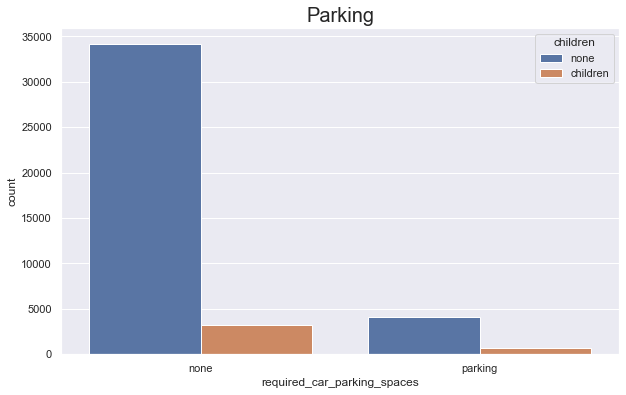

In [30]:
# graficos para categoricas
plt.figure(figsize=(10,6))
sns.set(style = "darkgrid")
plt.title("Parking", fontdict = {'fontsize': 20})
axis = sns.countplot(x = "required_car_parking_spaces", hue = 'children', data = hotels)

#### Correlaciones con variable target

A continuación se presentan las correlaciones con la variable target: "children".

En una primera instancias se correlaciona con las variables continuas mediante la correlación de pearson y luego se utiliza la correlación V de Cramer para las variables categóricas.

In [31]:
# Al crear la variable dummy_children se puede obtener una correlación
correlation = hotels.corr()["dummy_children"]
correlation.abs().sort_values(ascending=False)[1:]

reserved_room_children            0.451557
average_daily_rate                0.305963
adr_per_adult                     0.206676
high_demand                       0.143093
total_of_special_requests         0.131790
segment_nochild                   0.101454
booking_changes                   0.085422
adults                            0.065032
is_repeated_guest                 0.048787
previous_bookings_not_canceled    0.034279
days_in_waiting_list              0.020012
previous_cancellations            0.018417
lead_time                         0.018252
month                             0.017479
stays_in_weekend_nights           0.017016
stays_in_week_nights              0.015359
change_room_type                  0.002022
Name: dummy_children, dtype: float64

Las variables con mayor correlación entre las variables continuas son: adr, adr por adulto, la cantidad de pedidos especiales y los cambios en la reserva.

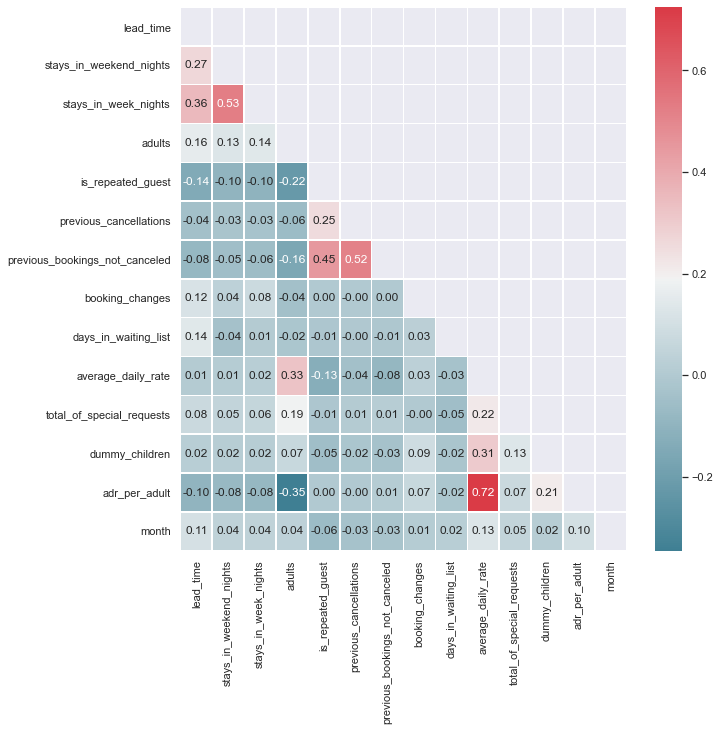

In [32]:
# Una mejor visualización de las correlaciones en la base puede hacerse mediante las librerias plt y sns
corr = hotels.drop(columns = ["reserved_room_children", "change_room_type", "segment_nochild", "high_demand"]).corr()
fig, ax = plt.subplots(figsize=(10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [33]:
# Correlación entre categporicas: V cramers

from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab = np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  stat = chi2_contingency(crosstab)[0]
  obs = np.sum(crosstab) 
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

In [34]:
# hotels.columns

In [35]:
from sklearn import preprocessing

categ = hotels[['children','hotel', 'meal', 'market_segment', 
                'distribution_channel', "segment_nochild",
                'reserved_room_type','assigned_room_type', 
                'deposit_type', 
                "country",
                'reserved_room_children','high_demand', 'change_room_type' ]]

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in categ.columns :
  data_encoded[i]=label.fit_transform(categ[i])

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in categ.columns :
  data_encoded[i]=label.fit_transform(categ[i])

rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)


La variable "reserved_room_children" resulta correlacionada con la variable target. Al igual que las variables de reserva y asignación de tipo de habitación.

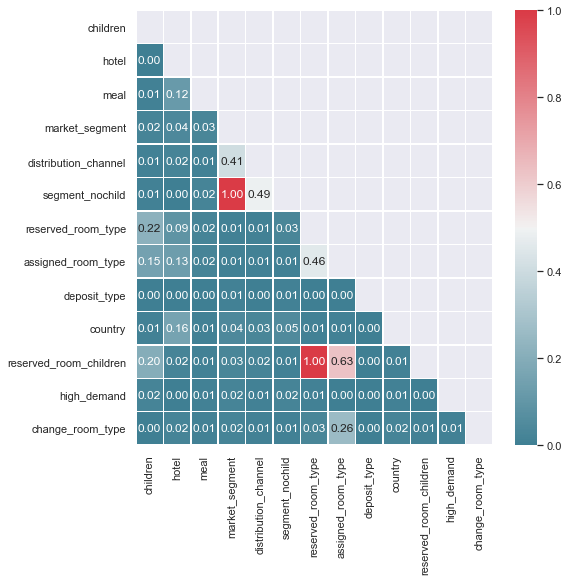

In [36]:
corr = df
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

### 1. Benchmark

Primero modelamos considerando solo las variables iniciales, sin tener en cuenta las nuevas creadas. Las variables que no se incluyen del set original son "country" y "arrival date".

In [37]:
# Dejamos definida una semilla para los modelos
seed = 11

In [38]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import matplotlib.pyplot as plt

import xgboost as xgb

import lightgbm as lgb

In [39]:
# guardamos una copia de la base resultante del EDA 
hotels_origin = hotels.copy()

hotels_origin.shape

(42278, 30)

In [40]:
datos = hotels_origin.drop(columns = {"arrival_date", "country",
                              "children","deposit_type",
                               'distribution_channel', 'reserved_room_children', 
                               'segment_nochild', "change_room_type",
                                "adr_per_adult", 'month', "high_demand"
                              })


## sacar deposit_type
datos2 = pd.get_dummies(datos,drop_first=True)

datos2.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'average_daily_rate',
       'total_of_special_requests', 'dummy_children', 'hotel_Resort_Hotel',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline_TA/TO', 'market_segment_Online_TA',
       'reserved_room_type_B', 'reserved_room_type_C', 'reserved_room_type_D',
       'reserved_room_type_E', 'reserved_room_type_F', 'reserved_room_type_G',
       'reserved_room_type_H', 'reserved_room_type_L', 'assigned_room_type_B',
       'assigned_room_type_C', 'assigned_room_type_D', 'assigned_room_type_E',
       'assigned_room_type_F', 'assigned_room_type_G', 'assigned_room_type_H',
       'assigned_room_type_I', '

In [41]:
# En esta celda se crea el set de entrenamiento y el set de test para poder evaluar el modelo
X,y = datos2.drop(['dummy_children'],axis=1),datos2.dummy_children.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, train_size = .80)


A continuación se entrenarán tres algoritmos: Random Forest, XGBoost y LightGBM

Como medida de comparación utilizaremos el AUC (area under the curve del ROC), debido a que la variable target no se encuentra balanceda. Utilizar las medidas "más tradicionales" como accuracy llevaría a decisiones menos acertadas.

#### Random Forest

El primer modelo es RF, se entrena con los valores por default de la librería.

In [42]:
## Se entrena el modelo sobre la base training:
clf=RandomForestClassifier(random_state=seed)
clf.fit(X_train, y_train)

## Se predice sobre el 80% definido como testing:
preds_rf_1 = clf.predict(X_test)

In [43]:
### Dejo indicados algunos cálculos de medidas, dejando un print habilitado solo para el AUC
# print (clf.score(X_train, y_train)) ## Sobre train (overfit)
# print (clf.score(X_test, y_test)) ## Sobre test
# print(sklearn.metrics.classification_report(y_test, preds_rf_1))

# Curva ROC
# fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, preds_rf_1)

# Plot ROC
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# calculate AUC
auc_rf_1 = sklearn.metrics.roc_auc_score(y_test, preds_rf_1)
print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)


##### MODELOS BENCHMARK #####
AUC rf: 0.709


#### XGBoost

Paso a considerar el modelo XGBoost - en una primera instancia dejo los hiperparámetros definidos por default y luego se tunean mediante un RandomizedSearchCV

In [44]:
## Se entrena el modelo sobre la base training:
model = xgb.XGBClassifier(random_state = seed)
model.fit(X_train, y_train, verbose=False)

## Se predice sobre el 80% definido como testing:
preds_xgb_1 = model.predict(X_test)

[21:40:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
# print (clf.score(X_train, y_train))
# print (clf.score(X_test,y_test))
# print(sklearn.metrics.classification_report(y_test, preds_xgb_1))

auc_xgb_1 = sklearn.metrics.roc_auc_score(y_test, preds_xgb_1)

print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)
print('AUC xgb: %.3f' % auc_xgb_1)

# # Importancia de variables
# xgb.plot_importance(model, max_num_features = 11)
# plt.tight_layout()
# plt.figure(figsize = (20, 22))
# plt.show()

##### MODELOS BENCHMARK #####
AUC rf: 0.709
AUC xgb: 0.722


In [46]:
# Seleccionamos el modelos XGBoost para clasificacion

clf = xgb.XGBClassifier(random_state = seed)

# Se definen los hyperparámetros para realizar el tunning mediante cross validation

params = {
"eta"    : [0.05, 0.10,0,15,  0.20, 0.25,  0.30 ] ,
'learning_rate' : [ 0.10,0.15,0.20,0.25,0.30],
'max_depth' : [ 3, 4, 5, 6, 8, 10],
'min_child_weight' : [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

# Se eligen los parámetros utilizando como scoring el area under the curve en el roc

grid=sklearn.model_selection.RandomizedSearchCV(clf,param_distributions=params,n_iter=5,
                                                scoring='roc_auc',n_jobs=-1,verbose=3,
                                                random_state = seed)
grid_result = grid.fit(X_train, y_train)
grid_result.best_estimator_

## Se entrena el modelo con los mejores estimadores sobre la base training:

model = xgb.XGBClassifier(**grid_result.best_params_, random_state = seed)
model.fit(X_train, y_train, verbose=False)

## Se predice sobre el 80% definido como testing:
preds_xgb_tun_1 = model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[21:40:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:40:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [47]:
# print (model.score(X_train, y_train))
# print (model.score(X_test,y_test))
# print(sklearn.metrics.classification_report(y_test, preds_xgb_tun_1))

auc_xgb_tun_1 = sklearn.metrics.roc_auc_score(y_test, preds_xgb_tun_1)

print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)
print('AUC xgb: %.3f' % auc_xgb_1)
print('AUC xgb tune: %.3f' % auc_xgb_tun_1)

# # Importancia de variables
# xgb.plot_importance(model, max_num_features = 11)
# plt.tight_layout()
# plt.figure(figsize = (20, 22))
# plt.show()

##### MODELOS BENCHMARK #####
AUC rf: 0.709
AUC xgb: 0.722
AUC xgb tune: 0.717


#### Light GBM

Paso a considerar el modelo Light GBM con definición de hiperparámetros mediante un RandomizedSearchCV

In [48]:
# Seleccionamos el modelos light GBM para clasificacion
import lightgbm as lgb
lgb=lgb.LGBMClassifier()

# Se definen los hyperparámetros para realizar el tunning mediante cross validation

parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

clf = sklearn.model_selection.RandomizedSearchCV(lgb,parameters,scoring='roc_auc',
                                                 n_iter=100,random_state = seed)

## Se entrena el modelo con los mejores estimadores sobre la base training:

clf.fit(X=X_train, y=y_train)
# print(clf.best_params_)

## Se predice sobre el 80% definido como testing:

preds_lgb_tun_1=clf.predict(X_test)

In [49]:
auc_gbm_1 = sklearn.metrics.roc_auc_score(y_test, preds_lgb_tun_1)

print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)
print('AUC xgb: %.3f' % auc_xgb_1)
print('AUC xgb tune: %.3f' % auc_xgb_tun_1)
print('AUC gbm: %.3f' % auc_gbm_1)

##### MODELOS BENCHMARK #####
AUC rf: 0.709
AUC xgb: 0.722
AUC xgb tune: 0.717
AUC gbm: 0.720


### 2) Nuevas variables

En estas nueva sección se repiten los modelos anteriores pero incluyendo nuevas variables: tanto las generadas a lo largo del EDA como nuevas definidas a continuación:

In [50]:
# hotels.columns

In [51]:
## Definimos nuevas variables:

hotels["waiting_lead"] = hotels["days_in_waiting_list"]/np.where(hotels["lead_time"]==0, 1 ,hotels["lead_time"])
hotels["request_adult"] = hotels["total_of_special_requests"]/np.where(hotels["adults"]==0, 1 ,hotels["adults"])
hotels["days_total"] =hotels['stays_in_weekend_nights']+hotels['stays_in_week_nights']
hotels["precio_total"]=hotels["average_daily_rate"]*hotels["days_total"]
hotels["lead_days"]=hotels["lead_time"]/hotels["days_total"]

In [52]:
datos = hotels.drop(columns = {"arrival_date", "country",
                              "children","deposit_type",
                               'distribution_channel'
                              })

datos2 = pd.get_dummies(datos, drop_first=True)

datos2.columns

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'average_daily_rate',
       'total_of_special_requests', 'dummy_children', 'adr_per_adult', 'month',
       'high_demand', 'reserved_room_children', 'change_room_type',
       'segment_nochild', 'waiting_lead', 'request_adult', 'days_total',
       'precio_total', 'lead_days', 'hotel_Resort_Hotel', 'meal_FB', 'meal_HB',
       'meal_SC', 'meal_Undefined', 'market_segment_Complementary',
       'market_segment_Corporate', 'market_segment_Direct',
       'market_segment_Groups', 'market_segment_Offline_TA/TO',
       'market_segment_Online_TA', 'reserved_room_type_B',
       'reserved_room_type_C', 'reserved_room_type_D', 'reserved_room_type_E',
       'reserved_room_type_F', 'reserved_room_type_G', 'reserved_room_type_H',
       'reserved_room_type_L', 'assigned_r

In [53]:
# Generar la base de entrenamiento y de testeo
X,y = datos2.drop(['dummy_children'],axis=1),datos2.dummy_children.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, train_size = .80)

#### Random Forest

RF se entrena, en una primera instancia, con los valores por default de la librería.

In [54]:
## Se entrena el modelo sobre la base training:
clf=RandomForestClassifier(random_state=seed)
clf.fit(X_train, y_train)

## Se predice sobre el 80% definido como testing:
preds_rf_2 = clf.predict(X_test)

In [55]:
### Dejo indicados algunos cálculos de medidas, dejando un print habilitado solo para el AUC
# print (clf.score(X_train, y_train)) ## Sobre train (overfit)
# print (clf.score(X_test, y_test)) ## Sobre test
# print(sklearn.metrics.classification_report(y_test, preds_rf_1))

# Curva ROC
# fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, preds_rf_1)

# Plot ROC
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.show()

# calculate AUC
auc_rf_2 = sklearn.metrics.roc_auc_score(y_test, preds_rf_2)
print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)
print('AUC xgb: %.3f' % auc_xgb_1)
print('AUC xgb tune: %.3f' % auc_xgb_tun_1)
print('AUC gbm: %.3f' % auc_gbm_1)
print("##### NUEVAS VARIABLES #####")
print('AUC rf: %.3f' % auc_rf_2)


##### MODELOS BENCHMARK #####
AUC rf: 0.709
AUC xgb: 0.722
AUC xgb tune: 0.717
AUC gbm: 0.720
##### NUEVAS VARIABLES #####
AUC rf: 0.720


Probamos con un RF tuneando hiperparámetros

In [56]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [57]:
# Seteamos la grilla de hiperparametros
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
param_grid

{'n_estimators': [50, 75, 100, 125, 150],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [2, 4],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [58]:
## Definimos el modelo, los hiperparámetros que mejor ajustan, 
# entrenamos sobre la base de training y predecimos dobre el testing

rf_Model = RandomForestClassifier(random_state = seed)
rf_RandomGrid = sklearn.model_selection.RandomizedSearchCV(estimator = rf_Model, 
                                                           param_distributions = param_grid, 
                                                           verbose=2, n_jobs = 4, scoring='roc_auc')

rf_RandomGrid.fit(X_train, y_train)
rf_RandomGrid.best_params_

preds_rf_tune2 =  rf_RandomGrid.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [59]:
# calculate AUC
auc_rf_tune_2 = sklearn.metrics.roc_auc_score(y_test, preds_rf_tune2)

print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)
print('AUC xgb: %.3f' % auc_xgb_1)
print('AUC xgb tune: %.3f' % auc_xgb_tun_1)
print('AUC gbm: %.3f' % auc_gbm_1)
print("##### NUEVAS VARIABLES #####")
print('AUC rf: %.3f' % auc_rf_2)
print('AUC rf tune: %.3f' % auc_rf_tune_2)

##### MODELOS BENCHMARK #####
AUC rf: 0.709
AUC xgb: 0.722
AUC xgb tune: 0.717
AUC gbm: 0.720
##### NUEVAS VARIABLES #####
AUC rf: 0.720
AUC rf tune: 0.638


#### XGBoost

Paso a considerar el modelo XGBoost - en una primera instancia dejo los hiperparámetros definidos por default y luego se tunean mediante un RandomizedSearchCV

In [60]:
## Se entrena el modelo sobre la base training:
model = xgb.XGBClassifier(random_state = seed)
model.fit(X_train, y_train, verbose=False)

## Se predice sobre el 80% definido como testing:
preds_xgb_2 = model.predict(X_test)

[21:43:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
# print (clf.score(X_train, y_train))
# print (clf.score(X_test,y_test))
# print(sklearn.metrics.classification_report(y_test, preds_xgb_2))

auc_xgb_2 = sklearn.metrics.roc_auc_score(y_test, preds_xgb_2)

print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)
print('AUC xgb: %.3f' % auc_xgb_1)
print('AUC xgb tune: %.3f' % auc_xgb_tun_1)
print('AUC gbm: %.3f' % auc_gbm_1)
print("##### NUEVAS VARIABLES #####")
print('AUC rf: %.3f' % auc_rf_2)
print('AUC rf tune: %.3f' % auc_rf_tune_2)
print('AUC xgb: %.3f' % auc_xgb_2)

# # Importancia de variables
# xgb.plot_importance(model, max_num_features = 11)
# plt.tight_layout()
# plt.figure(figsize = (20, 22))
# plt.show()

##### MODELOS BENCHMARK #####
AUC rf: 0.709
AUC xgb: 0.722
AUC xgb tune: 0.717
AUC gbm: 0.720
##### NUEVAS VARIABLES #####
AUC rf: 0.720
AUC rf tune: 0.638
AUC xgb: 0.735


In [62]:
# Seleccionamos el modelos XGBoost para clasificacion

clf = xgb.XGBClassifier(random_state = seed)

# Se definen los hyperparámetros para realizar el tunning mediante cross validation

params = {
"eta"    : [0.05, 0.10,0,15,  0.20, 0.25,  0.30 ] ,
'learning_rate' : [ 0.10,0.15,0.20,0.25,0.30],
'max_depth' : [ 3, 4, 5, 6, 8, 10],
'min_child_weight' : [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

# Se eligen los parámetros utilizando como scoring el area under the curve en el roc

grid=sklearn.model_selection.RandomizedSearchCV(clf,param_distributions=params,n_iter=5,
                                                scoring='roc_auc',n_jobs=-1,verbose=3,
                                                random_state = seed)
grid_result = grid.fit(X_train, y_train)
grid_result.best_estimator_

## Se entrena el modelo con los mejores estimadores sobre la base training:

model = xgb.XGBClassifier(**grid_result.best_params_, random_state = seed)
model.fit(X_train, y_train, verbose=False)

## Se predice sobre el 80% definido como testing:
preds_xgb_tun_2 = model.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[21:43:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:43:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
# print (model.score(X_train, y_train))
# print (model.score(X_test,y_test))
# print(sklearn.metrics.classification_report(y_test, preds_xgb_tun_2))

auc_xgb_tun_2 = sklearn.metrics.roc_auc_score(y_test, preds_xgb_tun_2)

print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)
print('AUC xgb: %.3f' % auc_xgb_1)
print('AUC xgb tune: %.3f' % auc_xgb_tun_1)
print('AUC gbm: %.3f' % auc_gbm_1)
print("##### NUEVAS VARIABLES #####")
print('AUC rf: %.3f' % auc_rf_2)
print('AUC rf tune: %.3f' % auc_rf_tune_2)
print('AUC xgb: %.3f' % auc_xgb_2)
print('AUC xgb tune: %.3f' % auc_xgb_tun_2)


##### MODELOS BENCHMARK #####
AUC rf: 0.709
AUC xgb: 0.722
AUC xgb tune: 0.717
AUC gbm: 0.720
##### NUEVAS VARIABLES #####
AUC rf: 0.720
AUC rf tune: 0.638
AUC xgb: 0.735
AUC xgb tune: 0.740


#### Light GBM

Paso a considerar el modelo Light GBM con definición de hiperparámetros mediante un RandomizedSearchCV

In [64]:
# Seleccionamos el modelos light GBM para clasificacion
import lightgbm as lgb
lgb=lgb.LGBMClassifier()

# Se definen los hyperparámetros para realizar el tunning mediante cross validation

parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

clf = sklearn.model_selection.RandomizedSearchCV(lgb,parameters,scoring='roc_auc',
                                                 n_iter=100,random_state = seed)

## Se entrena el modelo con los mejores estimadores sobre la base training:

clf.fit(X=X_train, y=y_train)
# print(clf.best_params_)

## Se predice sobre el 80% definido como testing:

preds_lgb_tun_2=clf.predict(X_test)

In [65]:
# # Curva ROC
# fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, preds_lgb_tun_2)

# # Plot ROC
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - LightGBM')
# plt.show()


In [66]:
auc_gbm_2 = sklearn.metrics.roc_auc_score(y_test, preds_lgb_tun_2)

print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)
print('AUC xgb: %.3f' % auc_xgb_1)
print('AUC xgb tune: %.3f' % auc_xgb_tun_1)
print('AUC lgbm: %.3f' % auc_gbm_1)
print("##### NUEVAS VARIABLES #####")
print('AUC rf: %.3f' % auc_rf_2)
print('AUC rf tune: %.3f' % auc_rf_tune_2)
print('AUC xgb: %.3f' % auc_xgb_2)
print('AUC xgb tune: %.3f' % auc_xgb_tun_2)
print('AUC lgbm: %.3f' % auc_gbm_2)

##### MODELOS BENCHMARK #####
AUC rf: 0.709
AUC xgb: 0.722
AUC xgb tune: 0.717
AUC lgbm: 0.720
##### NUEVAS VARIABLES #####
AUC rf: 0.720
AUC rf tune: 0.638
AUC xgb: 0.735
AUC xgb tune: 0.740
AUC lgbm: 0.738


### 3) Ensamble por "Votación"

Considerando que las diferencias entre los AUC de los modelos no son muy significativas (faltaría hacer algún test para ello, con diferentes semillas a ver si la diferencia es meramente estocástica), el modelo final será por votación de tres modelos: RF (default), LGB (tune) y XGB (tune).

In [67]:
# Extraemos los distintos resultados 
xgb_tun = pd.DataFrame(preds_xgb_tun_2, columns=['xgb_tun']) 
lgb_tun = pd.DataFrame(preds_lgb_tun_2, columns=['lgb_tun']) 
rf = pd.DataFrame(preds_rf_2, columns=['rf']) 
test = y_test.to_frame(name='test').reset_index(drop=True)

test = pd.concat([test, xgb_tun, lgb_tun, rf], axis=1)

## El resultado final será por votación en mayoría simple: 
# si la mitad más uno de los modelos consideran que dummy_children = 1 , entonces se considera 1.
# Es decir la suma de los tres modelos es mayor o igual a 2 para que se considere "con niños"

test["suma"] = test['xgb_tun'] + test['lgb_tun'] + test['rf']
test["votacion"] = np.where(test["suma"] >= 2, 1,0)

In [68]:
auc_votacion = sklearn.metrics.roc_auc_score(y_test, test["votacion"])
auc_votacion

print("##### MODELOS BENCHMARK #####")
print('AUC rf: %.3f' % auc_rf_1)
print('AUC xgb: %.3f' % auc_xgb_1)
print('AUC xgb tune: %.3f' % auc_xgb_tun_1)
print('AUC gbm: %.3f' % auc_gbm_1)
print("##### NUEVAS VARIABLES #####")
print('AUC rf: %.3f' % auc_rf_2)
print('AUC rf tune: %.3f' % auc_rf_tune_2)
print('AUC xgb: %.3f' % auc_xgb_2)
print('AUC xgb tune: %.3f' % auc_xgb_tun_2)
print('AUC gbm: %.3f' % auc_gbm_2)
print("##### ENSAMBLE #####")
print('AUC ensamble: %.3f' % auc_votacion)

##### MODELOS BENCHMARK #####
AUC rf: 0.709
AUC xgb: 0.722
AUC xgb tune: 0.717
AUC gbm: 0.720
##### NUEVAS VARIABLES #####
AUC rf: 0.720
AUC rf tune: 0.638
AUC xgb: 0.735
AUC xgb tune: 0.740
AUC gbm: 0.738
##### ENSAMBLE #####
AUC ensamble: 0.735


[[7589   89]
 [ 403  375]]


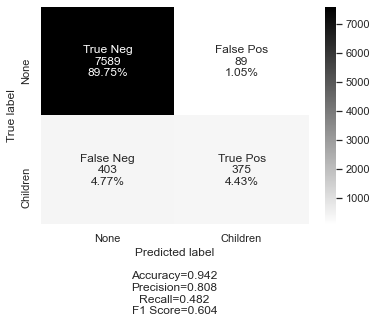

In [69]:
cf_matrix = confusion_matrix(y_test, test["votacion"])
print(cf_matrix)

### Thanks to https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['None', 'Children']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary',
                      figsize=(6, 4))

### 4) MODELO FINAL

Queda dejar planteados los entrenamientos sobre la base total para predecir nuevas observaciones 

In [70]:
##### BASE COMPLETA #######
datos_completo = hotels.drop(columns = {"arrival_date", "country",
                              "children","deposit_type",
                               'distribution_channel'
                              })

datos_completo = pd.get_dummies(datos_completo, drop_first=True)

X_completo = datos_completo.drop(['dummy_children'],axis=1)
y_completo = datos_completo.dummy_children.astype('int')

ENTRENAMIENTO DE MODELOS

In [71]:
##### RANDOM FOREST #######

tf_rf = RandomForestClassifier(random_state=seed)
tf_rf.fit(X_completo, y_completo)

##### XGBOOST #######

_xgb = xgb.XGBClassifier(random_state = seed)
params = {
"eta"    : [0.05, 0.10,0,15,  0.20, 0.25,  0.30 ] ,
'learning_rate' : [ 0.10,0.15,0.20,0.25,0.30],
'max_depth' : [ 3, 4, 5, 6, 8, 10],
'min_child_weight' : [ 1, 3, 5, 7 ],
'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

grid=sklearn.model_selection.RandomizedSearchCV(_xgb,param_distributions=params,n_iter=5,
                                                scoring='roc_auc',n_jobs=-1,verbose=3,
                                                random_state = seed)
grid_result = grid.fit(X_train, y_train)
tf_xgb = xgb.XGBClassifier(**grid_result.best_params_, random_state = seed)

tf_xgb.fit(X_completo, y_completo, verbose=False)


##### LightGBM #######

import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

tf_lgb = sklearn.model_selection.RandomizedSearchCV(lgb,parameters,scoring='roc_auc',
                                                    n_iter=100,random_state = seed)
tf_lgb.fit(X = X_completo, y = y_completo)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[21:47:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:47:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=LGBMClassifier(), n_iter=100,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [-1, 5, 10, 20],
                                        'min_child_samples': [5, 10, 15],
                                        'num_leaves': [20, 40, 60, 80, 100],
                                        'reg_alpha': [0, 0.01, 0.03]},
                   random_state=11, scoring='roc_auc')

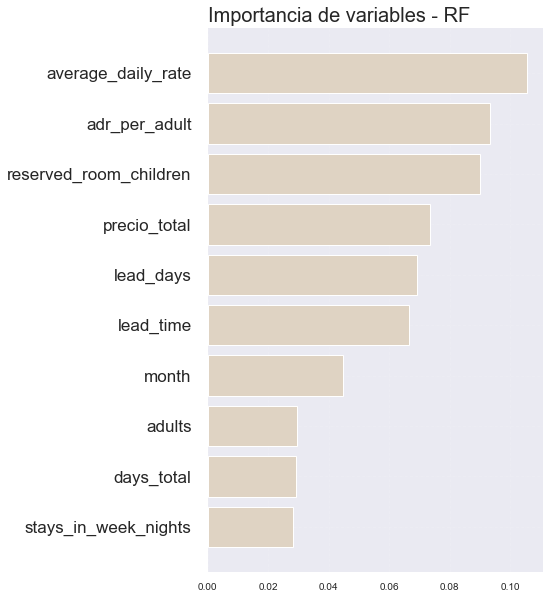

In [72]:
### VARIABLES IMPORTANTES RF:

importance = pd.DataFrame(tf_rf.feature_importances_, columns=['importance']).set_index(X_completo.columns).reset_index()
imp_rf = importance.copy()

imp_orden = importance.sort_values(by = ['importance'], ascending=False)
name = imp_orden['index'].head(10)
price = imp_orden['importance'].head(10)

fig, ax = plt.subplots(figsize =(6, 10))

ax.barh(name, price, color='#DFD3C3')  

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5, labelsize=10)
ax.yaxis.set_tick_params(pad = 10, labelsize=17)

ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()


ax.set_title('Importancia de variables - RF',loc ='left', size = 20)



plt.show()



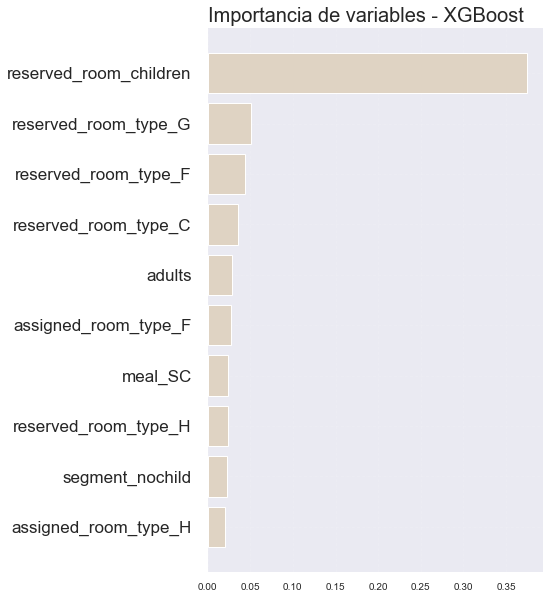

In [73]:
### VARIABLES IMPORTANTES XGBoost:

importance = pd.DataFrame(tf_xgb.feature_importances_, columns=['importance']).set_index(X_completo.columns).reset_index()
imp_xgb= importance.copy()

imp_orden = importance.sort_values(by = ['importance'], ascending=False)

name = imp_orden['index'].head(10)
price = imp_orden['importance'].head(10)

fig, ax = plt.subplots(figsize =(6, 10))

ax.barh(name, price, color='#DFD3C3') 

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5, labelsize=10)
ax.yaxis.set_tick_params(pad = 10, labelsize=17)

ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()


ax.set_title('Importancia de variables - XGBoost',loc ='left', size = 20)


plt.show()



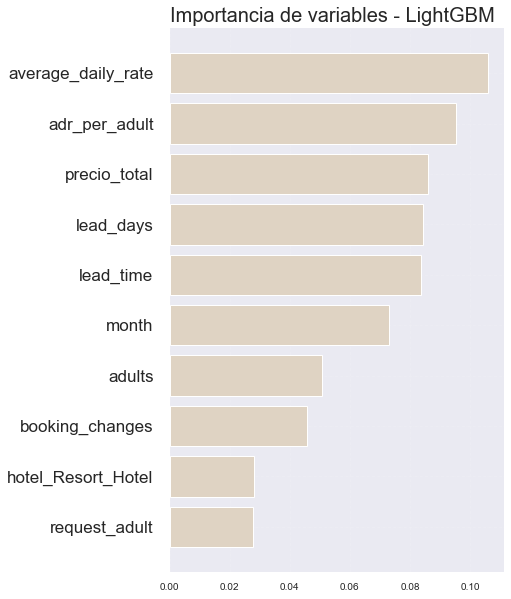

In [74]:
### VARIABLES IMPORTANTES LightGBM:

importance = pd.DataFrame(tf_lgb.best_estimator_.feature_importances_, columns=['importance_1']).set_index(X_completo.columns).reset_index()
importance['importance'] = importance['importance_1'] / (importance['importance_1'].sum())

imp_lgbm = importance.copy()

imp_orden = importance.sort_values(by = ['importance'], ascending=False)

name = imp_orden['index'].head(10)
price = imp_orden['importance'].head(10)

fig, ax = plt.subplots(figsize =(6, 10))

ax.barh(name, price, color='#DFD3C3') 

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5, labelsize=10)
ax.yaxis.set_tick_params(pad = 10, labelsize=17)

ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()


ax.set_title('Importancia de variables - LightGBM',loc ='left', size = 20)



plt.show()


NUEVOS DATOS

Queda muteado el código por ausencia de nueva base

In [75]:
# X_new = "nuevos datos"

Predicciones:

In [76]:
##### RANDOM FOREST #######
# pred_rf = tf_rf.predict(X_new)

##### XGBOOST #######
# pred_xgb = tf_xgb.predict(X_new)

##### LightGBM #######
# pred_lgb = tf_lgb.predict(X_new)

In [77]:

# pred_rf = pd.DataFrame(pred_rf, columns=['rf']) 
# pred_xgb = pd.DataFrame(pred_xgb, columns=['xgb']) 
# pred_lgb = pd.DataFrame(pred_lgb, columns=['lgb']) 

# pred = pd.concat([pred_rf, pred_xgb, pred_lgb], axis=1)

# pred["pred_final"] = np.where((pred['rf'] + pred['xgb'] + pred['lgb']) >= 2, 1,0)

## Part III - Results & Conclusions

In [78]:
#
# Se adjunta PPT
#